In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb


from path_setup import setup_paths
setup_paths()

In [2]:
from dataset_transformer import BaseDatasetTransform
from base_model_train import BaseModelTrain
from model_evaluator import ModelEvaluator
from embeddings_tools import get_embeddings
from intelligence_tools import AnalyzeVariables

In [3]:
df = pd.read_csv('../datasets/diagnosis.csv')
df.columns=['temperature', 'nausea_occurence', 'lumbar_pain', 'urine_pushing', 
               'micturition_pains', 'bis','inflammation_pred', 'nephritis_pred']

In [ ]:
df.to_csv('acute_inflammations.csv', index=False)

In [4]:
av = AnalyzeVariables(df)

In [5]:
av.shape()

'120 - строк и 8 колонок с переменными в датасете'

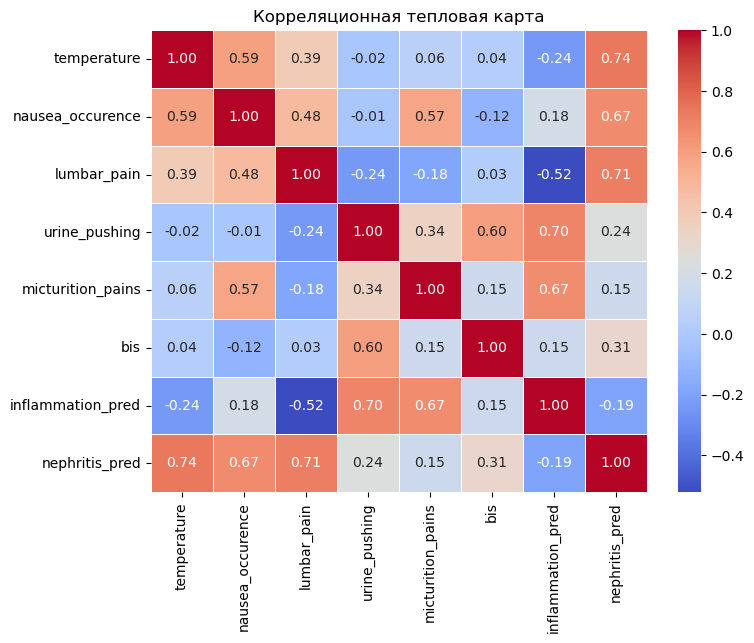

In [6]:
av.corr_heatmap()

In [8]:
av.missing_percentage()

temperature          0.0
nausea_occurence     0.0
lumbar_pain          0.0
urine_pushing        0.0
micturition_pains    0.0
bis                  0.0
inflammation_pred    0.0
nephritis_pred       0.0
dtype: float64

In [10]:
bdf = BaseDatasetTransform(df,target=['inflammation_pred','nephritis_pred'])

In [11]:
X_train, X_test, y_train, y_test,categorical_features = bdf.fit_transform()

Series([], dtype: int64)

В колонке(ах) ['inflammation_pred', 'nephritis_pred'] нет пропущенных значений
В наборе данных нет пропущенных значений
-------------------------------------------
Информация о колонках в датасете

Категориальные колонки:
Index([], dtype='object')

Числовые колонки:
Index(['temperature', 'nausea_occurence', 'lumbar_pain', 'urine_pushing',
       'micturition_pains', 'bis'],
      dtype='object')


In [12]:
from sklearn.multioutput import MultiOutputClassifier


lgbm_model = MultiOutputClassifier(lgb.LGBMClassifier(verbose=-1))

columns_to_delete = []  

unique_classes = len(set(y_train))
print(unique_classes)

model_train = BaseModelTrain(
    model=lgbm_model,
    columns_to_delete=columns_to_delete,
    categorical_features=categorical_features,
    boosting_type='gbdt',
)

2


In [13]:
metrics = ['accuracy', 'precision', 'f1_macro','recall']
evaluator = ModelEvaluator(model_trainer=model_train, metrics=metrics,base_multitarget=True)

evaluator.fit(X_train, y_train)

ModelEvaluator(base_multitarget=True,
               metrics=['accuracy', 'precision', 'f1_macro', 'recall'],
               model_trainer=BaseModelTrain(categorical_features=[],
                                            columns_to_delete=[],
                                            model=MultiOutputClassifier(estimator=LGBMClassifier(verbose=-1))))

In [14]:
evaluator.evaluate_to_dataframe(X_test, y_test)

,accuracy,precision,f1_macro,recall,Targets
0,1.0,1.0,1.0,1.0,inflammation_pred
1,1.0,1.0,1.0,1.0,nephritis_pred
